# Data Visualization

## plot the distribution of important variables

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_csv('./data/clean_data/data.csv')

In [ ]:
#check all columns
df.columns.values

array(['Unnamed: 0', 'ID', 'Year_Birth', 'Education', 'Marital_Status',
       'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain',
       'Z_CostContact', 'Z_Revenue', 'Response', 'Education_group',
       'Marital_Status_group', 'Age', 'Age_group', 'Recency_group',
       'MnProd', 'childnum', 'NumPurch'], dtype=object)

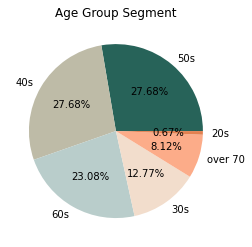

In [ ]:
#plot pie of age group
plt.pie(df['Age_group'].value_counts().reset_index().iloc[:,1],
        labels=['50s','40s','60s','30s','over 70','20s'],
        colors=['#276359', '#BEBBA7', '#B9CDCB', '#F2DDCC', '#FCAC89', '#E38150'],
        autopct='%.2f%%'
)
plt.title('Age Group Segment')
plt.show()

In [ ]:
df['Recency_group'].value_counts()

under three months    686
under two months      664
under a month         337
over three month      198
under half month      183
under a week          172
Name: Recency_group, dtype: int64

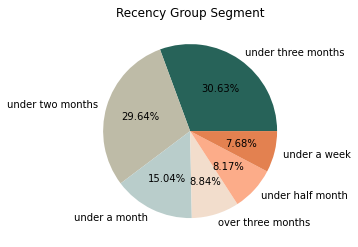

In [ ]:
#plot pe of recency group
plt.pie(df['Recency_group'].value_counts().reset_index().iloc[:,1],
        labels = ['under three months','under two months','under a month','over three months','under half month','under a week'],
        colors=['#276359', '#BEBBA7', '#B9CDCB', '#F2DDCC', '#FCAC89', '#E38150'],
        autopct='%.2f%%'
)
plt.title('Recency Group Segment')
plt.show()

In [ ]:
df['Education_group'].value_counts()

Graduation         1127
PhD                 486
Master              370
Undergraduation     257
Name: Education_group, dtype: int64

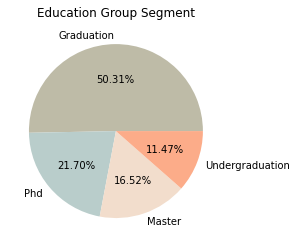

In [ ]:
#plot pe of education group
plt.pie(df['Education_group'].value_counts().reset_index().iloc[:,1],
       labels=['Graduation','Phd','Master','Undergraduation'],
       colors=['#BEBBA7', '#B9CDCB', '#F2DDCC', '#FCAC89'],
       autopct='%.2f%%')
plt.title('Education Group Segment')
plt.show()

In [ ]:
df['Marital_Status_group'].value_counts()

Married     864
Together    580
Single      483
Divorced    232
Widow        77
Other         4
Name: Marital_Status_group, dtype: int64

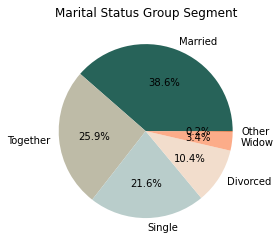

In [ ]:
plt.pie(df['Marital_Status_group'].value_counts().reset_index().iloc[:,1],
        labels=['Married','Together','Single','Divorced','Widow','Other'],
        colors=['#276359', '#BEBBA7', '#B9CDCB', '#F2DDCC', '#FCAC89', '#E38150'],
        autopct='%.1f%%'
)
plt.title('Marital Status Group Segment')
plt.show()

In [ ]:
df['childnum'].value_counts()

1    1128
0     638
2     421
3      53
Name: childnum, dtype: int64

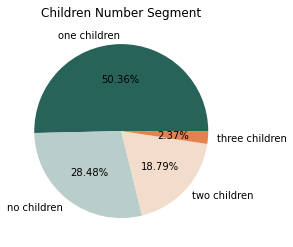

In [ ]:
plt.pie(df['childnum'].value_counts().reset_index().iloc[:,1],
        labels=['one children','no children','two children','three children'],
        colors=['#276359', '#B9CDCB', '#F2DDCC', '#E38150'],
        autopct='%.2f%%'
       )
plt.title('Children Number Segment')
plt.show()

From the above pie plots concerning the basic information of customers, we can summary as follow:
1.The customer are mostly in 40s~60s.
2.It has been two or three months since the last purchase for 60% customers.
3.Half of the customers have graduated and, of those remaining, PhDs account for the largest share.
4.More than half of customers have a partner.
5.Half of customers have one children.

(0.0, 200000.0)

<Figure size 432x288 with 0 Axes>

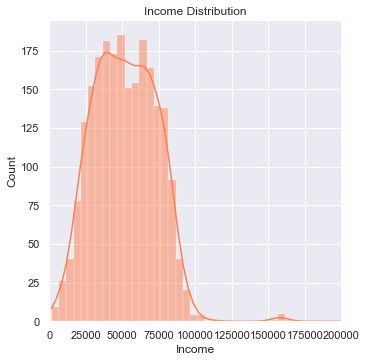

In [ ]:
#check the Income distribution
import seaborn as sns, numpy as np, scipy.stats as stats
plt.figure()
sns.set_theme()
sns.displot(df['Income'],kde=True,color='coral').set(title='Income Distribution')

plt.xlim(0,200000)

From hist plot of Income Distribution, the income of maincustomers base ranges from $30,000 to  $80,000

Visualize the correlations between the important variables

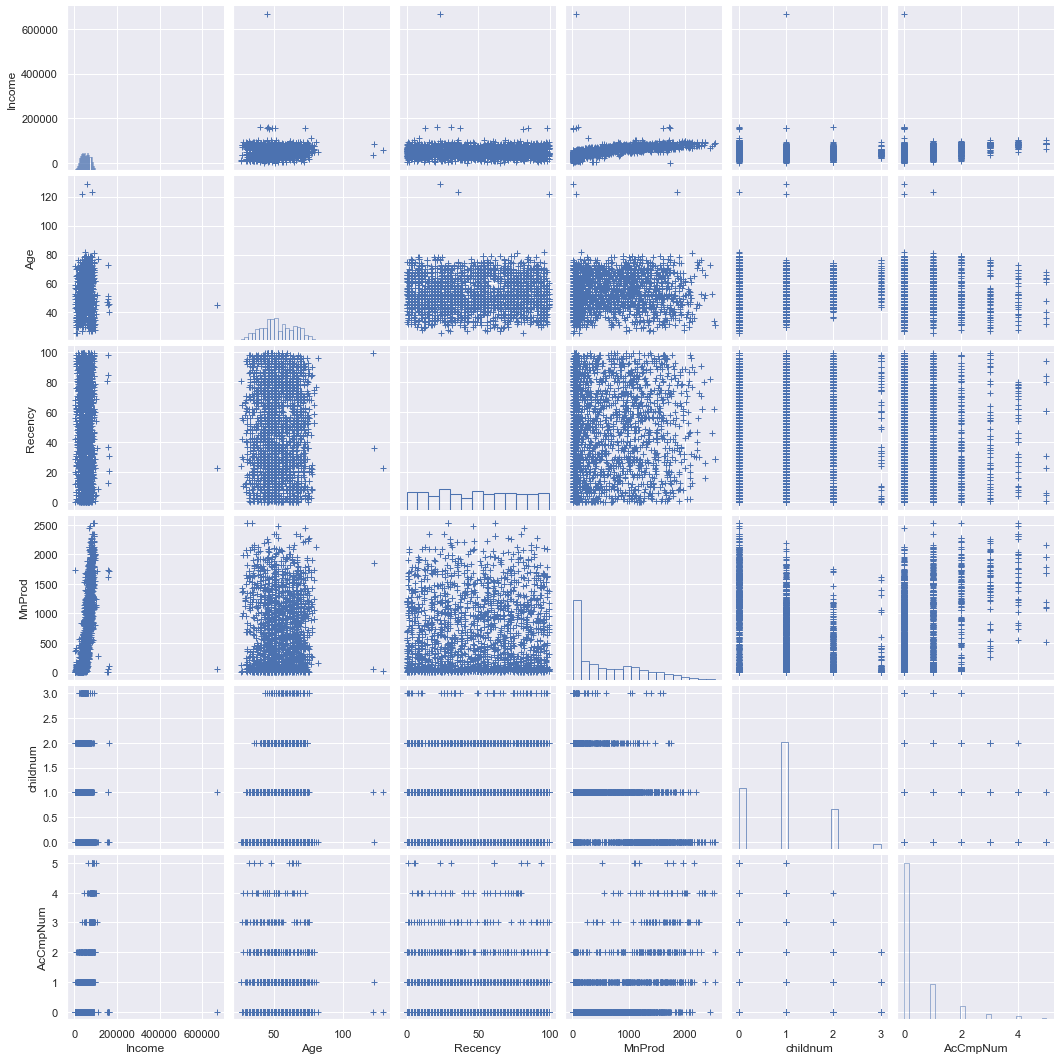

In [ ]:
# calculate the number of accepted the offer
df['AcCmpNum']=df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response']

col=['Income','Age','Recency','MnProd','childnum','AcCmpNum']
sns.set_theme()
sns.pairplot(df[col],diag_kws=dict(fill=False),plot_kws=dict(marker="+", linewidth=1))

Using heatmap is to measure the linear correlation among the variables, that is Pearson Correlation Coefficient.

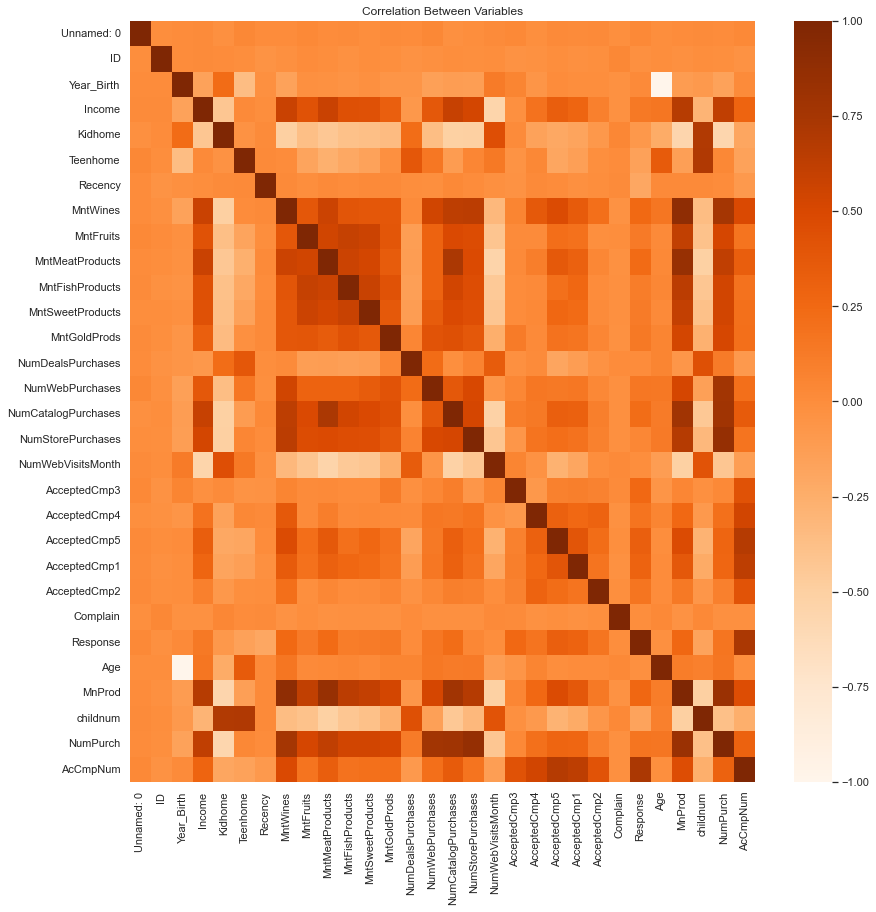

In [ ]:
#df.drop(['Z_CostContact','Z_Revenue'],axis=1,inplace=True)
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(),cmap='Oranges')
plt.title('Correlation Between Variables')
plt.show()

## analyze product purchasing power
We need to find out which products are most popular and the trends among different age groups. 

In [ ]:
import plotly.graph_objects as go

ModuleNotFoundError: No module named 'plotly'

In [ ]:
product = df[['Age_group', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
product_groupby = product.groupby('Age_group').agg('sum').reset_index()
age_group_list = sorted(list(product_groupby['Age_group']))

fig = go.Figure()

buttons = []
age_group_names = []

default_age_group = '20s'

for age in age_group_list:
    tmp = product_groupby[product_groupby['Age_group'] == age]
    globals()['product_{}'.format(age)] = tmp.T.iloc[1:,:].reset_index()
    globals()['product_{}'.format(age)]['index'] = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold']
    globals()['product_{}'.format(age)].columns = ['Product_type', 'Purchase_Amt']

    fig.add_trace(go.Bar(x=globals()['product_{}'.format(age)]['Product_type'],
                         y=globals()['product_{}'.format(age)]['Purchase_Amt'],
                         width=0.7,
                         visible=(age==default_age_group),
                         marker_color=colormap))
    age_group_names.extend([age])
    
for age in age_group_list:
    buttons.append(dict(method='update',
                        label=age,
                        args=[{'visible': [age==a for a in age_group_names]}]))

fig.update_layout(paper_bgcolor="rgb(50,50,50,50)", plot_bgcolor="rgb(50,50,50,50)",
                  title_text='Purchase Amount By Product Type',
                  width=800,height=600,
                  font=dict(
                         family="Ubuntu Mono",
                         color='white',
                         size=18),
                  hoverlabel=dict(
                         bgcolor="white",
                         font_size=16,
                         font_family="Ubuntu Mono"),
                  updatemenus=[{'buttons': buttons,
                                'direction': 'down',
                                'active': age_group_list.index(default_age_group),
                                'showactive': True,
                                'x': 1.0,
                                'y': 1.15}]
                 )
fig.show()

NameError: name 'go' is not defined